# Prelude

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

# Observatory Performance Mode

In [169]:
opm = "glao"

# Telemetry

In [170]:
data = pd.read_parquet(f"{opm}-logs.parquet")

In [171]:
data.tail()

,WfeRms,SegmentWfeRms,SegmentPiston,ResidualWfeRms,SegmentResidualWfeRms,SegmentResidualPiston
4995,[1.2073974176018964e-06],"[8.513647458130436e-07, 7.658481422367913e-07,...","[7.898364628999843e-07, 7.026675348242861e-07,...",[1.0931938732028357e-06],"[9.073616524801764e-07, 5.635470188281033e-07,...","[7.833056088202284e-07, 6.922621764715586e-07,..."
4996,[1.2076579878339544e-06],"[8.508051791977778e-07, 7.648628184142581e-07,...","[7.904848189355107e-07, 7.031084692243894e-07,...",[1.0951691820082488e-06],"[9.096789312934561e-07, 5.651704100273491e-07,...","[7.838441433705157e-07, 6.929253117959888e-07,..."
4997,[1.2079343605364556e-06],"[8.506590347678866e-07, 7.635509291503695e-07,...","[7.906264727353118e-07, 7.02844829447713e-07, ...",[1.0967009984597098e-06],"[9.109497796089272e-07, 5.645389364872244e-07,...","[7.839283853172674e-07, 6.926703690623981e-07,..."
4998,[1.207981199513597e-06],"[8.497433441334579e-07, 7.623012834301335e-07,...","[7.907428880571388e-07, 7.029767630228889e-07,...",[1.0976170869980706e-06],"[9.110455039262888e-07, 5.642920655191119e-07,...","[7.840950502213673e-07, 6.928178777343419e-07,..."
4999,[1.208224603033159e-06],"[8.493041718793393e-07, 7.610427132931363e-07,...","[7.909495707281167e-07, 7.026192747616733e-07,...",[1.0989035672537284e-06],"[9.115321404351562e-07, 5.635372417600593e-07,...","[7.842720606276998e-07, 6.924486228854221e-07,..."


# Last step wavefronts

In [172]:
wavefront = pd.read_parquet(f"{opm}-wavefront.parquet")
wavefront

,Wavefront,ReconWavefront,ResidualWavefront
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


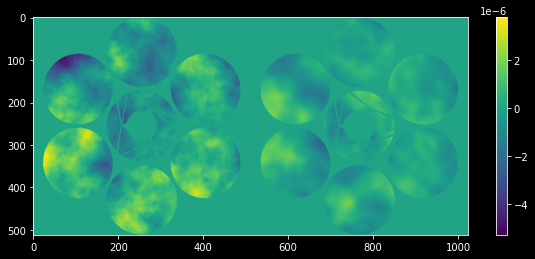

In [173]:
fig, ax = plt.subplots(figsize=(10,4))
h = ax.imshow(np.hstack([np.vstack(wavefront["Wavefront"])[-1].reshape(-1,512),\
                      -np.vstack(wavefront["ReconWavefront"])[-1].reshape(-1, 512)]))
fig.colorbar(h,ax=ax)

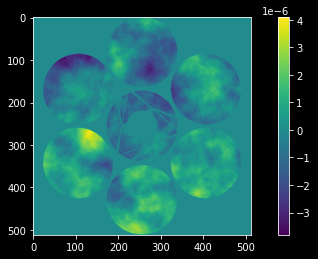

In [174]:
fig, ax = plt.subplots(figsize=(10,4))
h = ax.imshow(np.vstack(wavefront["Wavefront"])[-1].reshape(-1,512)
                      +np.vstack(wavefront["ReconWavefront"])[-1].reshape(-1, 512))
fig.colorbar(h,ax=ax)

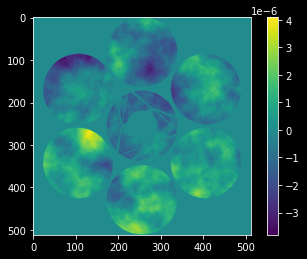

In [175]:
plt.imshow(np.vstack(wavefront["ResidualWavefront"])[-1].reshape(-1,512))
plt.colorbar()


# Wavefront RMS

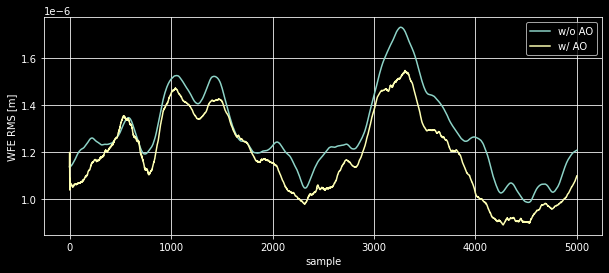

In [190]:
fig,ax = plt.subplots(figsize=(10,4))
ax.plot(np.vstack(data["WfeRms"]),label='w/o AO')
ax.plot(np.vstack(data["ResidualWfeRms"]), label='w/ AO')
ax.grid()
ax.set_xlabel("sample")
ax.set_ylabel("WFE RMS [m]")
ax.legend()


# Segment Wavefront RMS

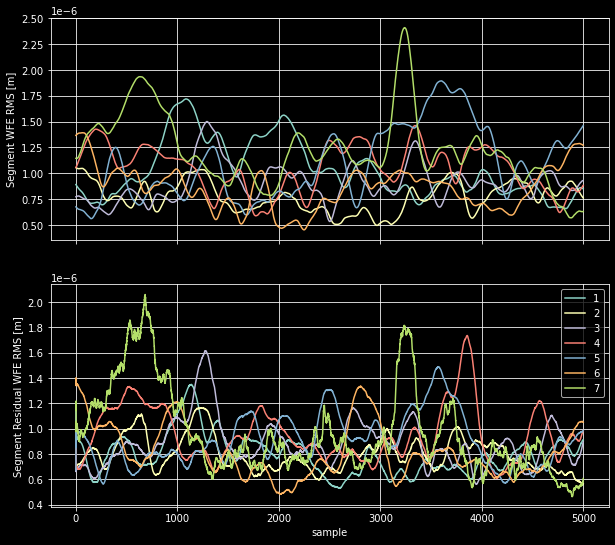

In [177]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(10, 9))
ax = axs[0]
ax.plot(np.vstack(data["SegmentWfeRms"]))
ax.grid()
ax.set_ylabel("Segment WFE RMS [m]")
ax = axs[1]
ax.plot(np.vstack(data["SegmentResidualWfeRms"]))
ax.grid()
ax.set_xlabel("sample")
ax.set_ylabel("Segment Residual WFE RMS [m]")
ax.legend(range(1, 8))


# Segment Piston

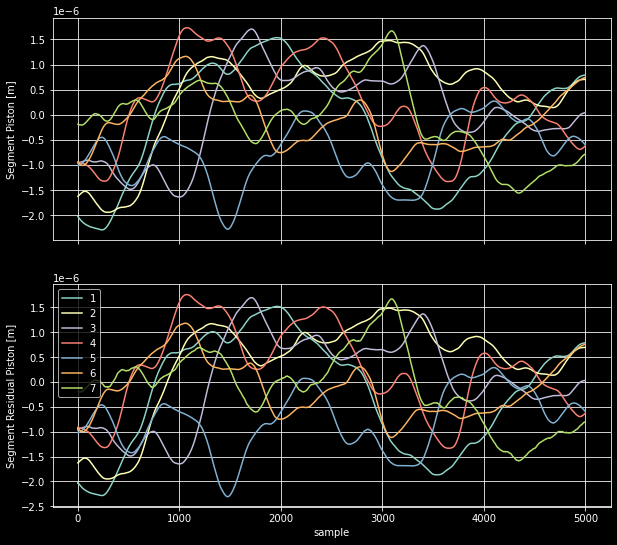

In [178]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(10, 9))
ax = axs[0]
ax.plot(np.vstack(data["SegmentPiston"]))
ax.set_ylabel("Segment Piston [m]")
ax.grid()
ax = axs[1]
ax.plot(np.vstack(data["SegmentResidualPiston"]))
ax.grid()
ax.set_xlabel("sample")
ax.set_ylabel("Segment Residual Piston [m]")
ax.legend(range(1, 8))


# Images

In [179]:
frame = pd.read_parquet(f"{opm}-frame.parquet")
frame

,NaturalSeeingImage,NaturalSeeingPSSnFwhm,DiffractionLimitedImage,GlaoPSSnFwhm
0,"[3996210400.0, 4144601000.0, 4424403500.0, 469...","[1.2750155925750732, 2.2307447850698195e-06]","[4336408600.0, 4335819300.0, 4425389000.0, 463...","[1.2499514818191528, 2.339867256998241e-06]"


## Natural Seeing image

(-0.5, 0.5)

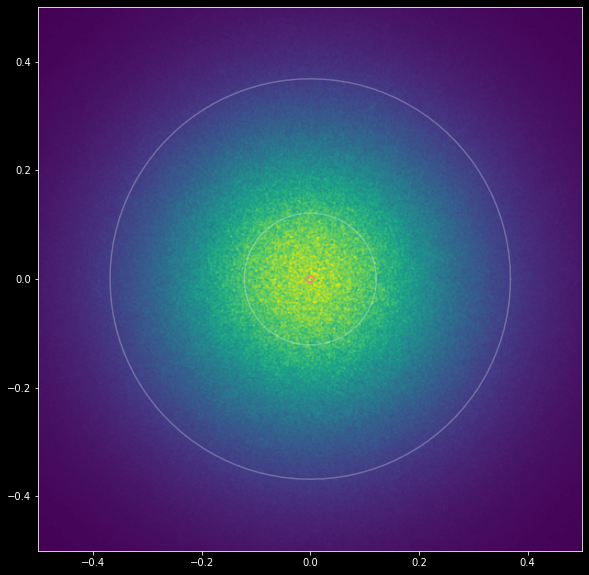

In [180]:
fig,ax = plt.subplots(figsize=(10,10))
px_scale = (180*3600/np.pi) * 0.5*0.5e-6/25.5
h = px_scale * 511/2
o = np.linspace(0, 2*np.pi, 101)
x, y = np.cos(o), np.sin(o)
ax.imshow(np.vstack(frame['NaturalSeeingImage']).reshape(512, -1),extent = [-h, h, -h, h])
r = px_scale * 25.5/8.365
ax.plot(x*r, y*r, 'C3')
r = px_scale * 60
ax.plot(x*r, y*r, 'w', alpha=0.25)
r = px_scale * 25.5/14E-2
ax.plot(x*r, y*r, 'w', alpha=0.25)
lim = np.asarray([-1, 1])*0.5
ax.set_xlim(lim)
ax.set_ylim(lim)


# Adaptive Optics image

In [181]:
np.vstack(frame["NaturalSeeingPSSnFwhm"])[0,1]*(180*3600e3/np.pi),\
np.vstack(frame["GlaoPSSnFwhm"])[0,1]*(180*3600e3/np.pi),\
    (180e3*3600/np.pi)*550e-9/8.365,(180e3*3600/np.pi)*550e-9/14e-2

(460.1241408791469, 482.632266408667, 13.561941833341661, 810.3260245421643)

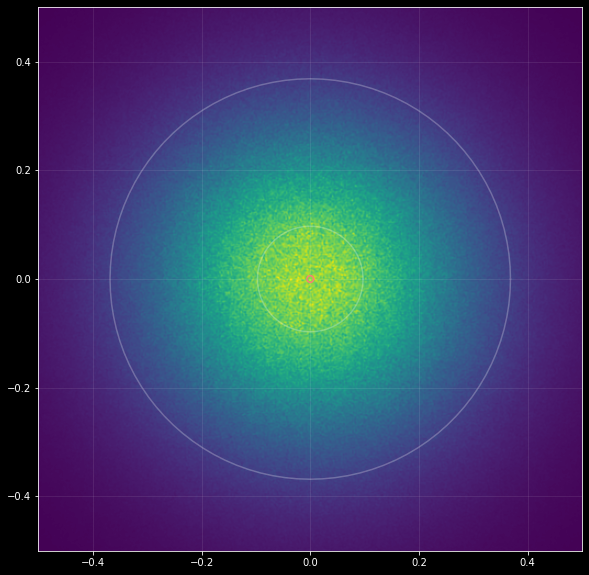

In [185]:
px_scale = (180*3600/np.pi) * 0.5*0.5e-6/25.5
h = px_scale * 511/2
o = np.linspace(0, 2*np.pi, 101)
x, y = np.cos(o), np.sin(o)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.vstack(frame['DiffractionLimitedImage']).reshape(512, -1),
          extent=[-h, h, -h, h])
r = px_scale * 25.5/8.365
ax.plot(x*r, y*r, 'C3')
r = px_scale * 48
ax.plot(x*r, y*r, 'w', alpha=0.25)
r = px_scale * 25.5/14E-2
ax.plot(x*r, y*r, 'w', alpha=0.25)
lim = np.asarray([-1, 1])*0.5
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.grid(alpha=0.1)


In [183]:
0.5e-6/(0.25/(180*3600/np.pi))


0.4125296124941927

In [184]:
25.5/60

0.425